In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample #to handle imbalanced data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score#to split the data and tune hyperparameters
from sklearn.ensemble import RandomForestClassifier#to build the model
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score #to evaluate the model
import pickle #to save the model to a file



In [367]:
data = pd.read_csv('Rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [368]:
data.shape#(rows,columns)


(366, 12)

In [369]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [370]:
data.info()#summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [371]:
data.tail()#last 5 records

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [372]:
data['day'].unique() #unique values in 'day' column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [373]:
#remove extra spaces from all columns
data.columns = data.columns.str.strip()
data.info()#summary of the dataframe after removing spaces

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [374]:
data = data.drop(columns=['day'])#dropping date column as it is not needed for analysis
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [375]:
#missing values
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [376]:
data['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [377]:
#handling missing values by filling with mode
data['winddirection']=data['winddirection'].fillna(data['winddirection'].mode()[0]) #replacing with most frequent value for categorical column

In [378]:
data['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [379]:
#handling missing values by filling with midian
data['windspeed']=data['windspeed'].fillna(data['windspeed'].median())#numerical column

In [380]:
data.isnull().sum()#checking for null values

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [381]:
data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [382]:
#replacing yes/no with 1/0
data['rainfall']=data['rainfall'].replace({'yes':1,'no':0})
data.head()

C:\Users\Malsha\AppData\Local\Temp\ipykernel_6580\1538499563.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rainfall']=data['rainfall'].replace({'yes':1,'no':0})


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


Exploratory Data Analysis

In [383]:
data.shape

(366, 11)

In [384]:
sns.set(style="whitegrid")



In [385]:
data.describe()#statistical summary of numerical columns

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


When the mean value and median value are very close to each other-> uniform/normal distribution. The difference between them means the distribution is skewed 

In [386]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

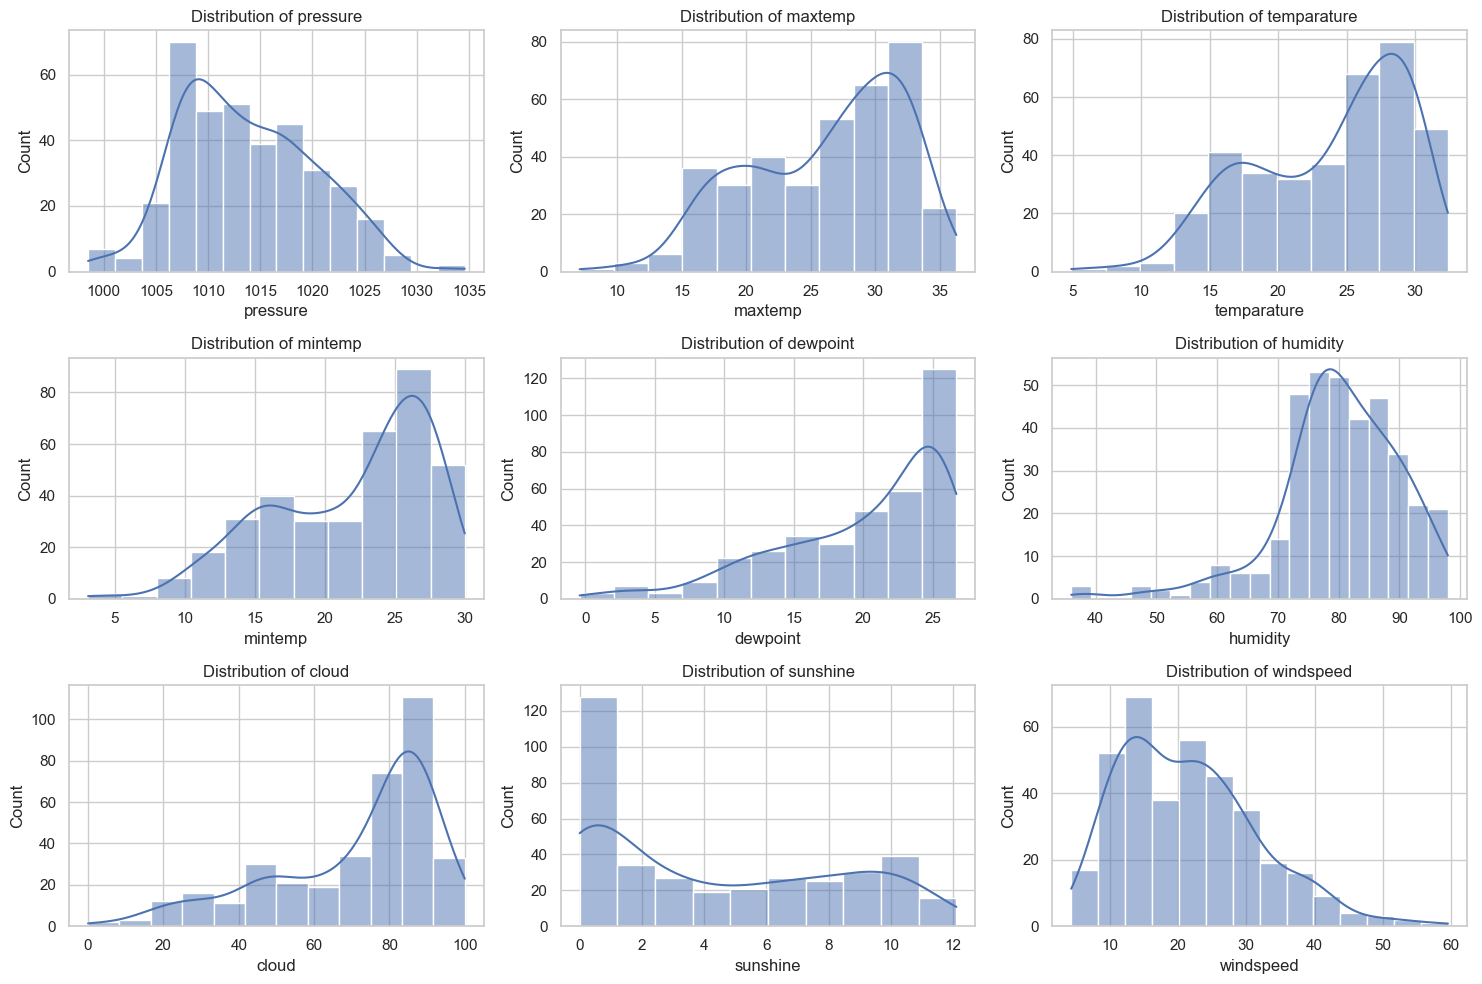

In [387]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()



for logistic regression or other classifiers expects the data tobe normally distributed or they should have a uniform distribution where it is not skewed. They work better when features are scaled (normalized or standardized) -> should normalize

But tree based classifiers (Decision tree, RF,XGboost) doesn't have these art based constraints-they do NOT depend on feature scale, do NOT assume normal distribution, so here Normalization is NOT required for tree-based models.

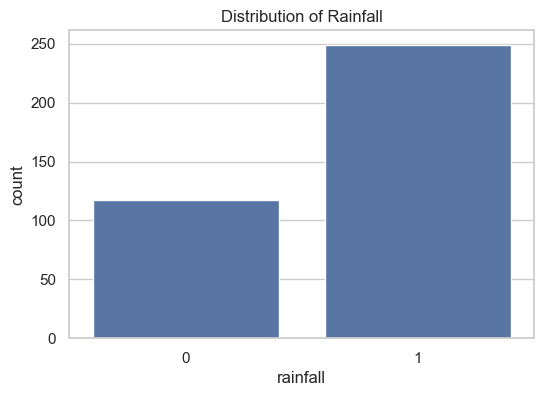

In [388]:
#categorical columns distribution
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=data)
plt.title('Distribution of Rainfall')
plt.show()

The plot shows that days with rainfall (1) occur more frequently than days without rainfall (0), indicating a dataset skewed toward rainy days.

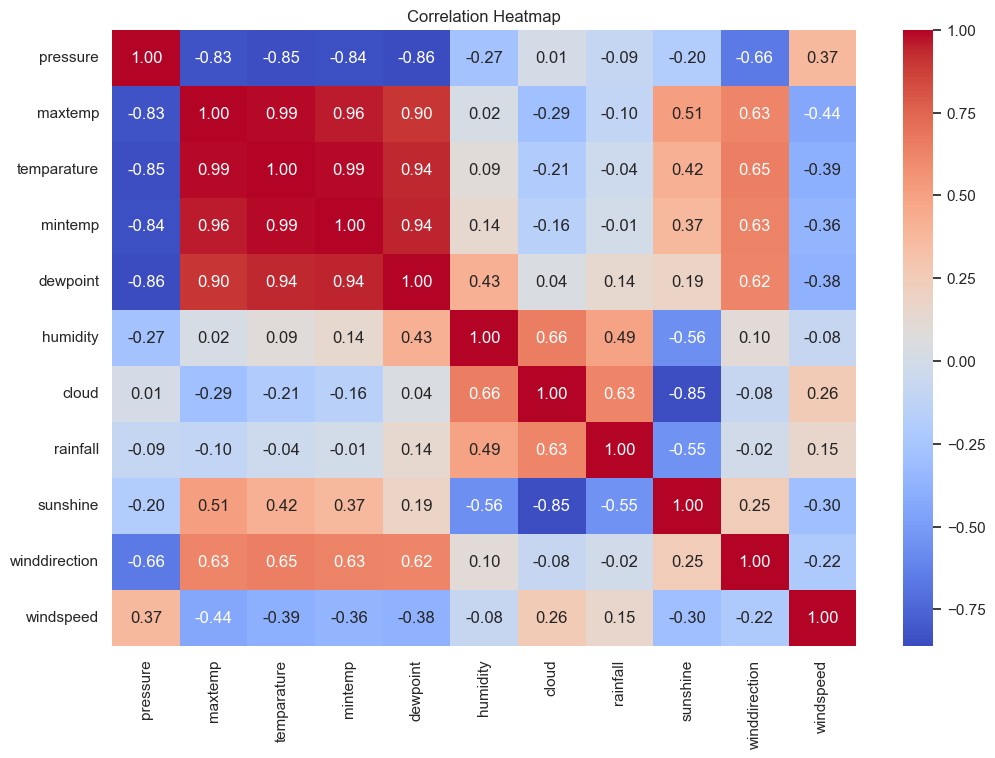

In [389]:
#correlation heatmap
#multi-collinearity check
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='coolwarm')#annot->show values,fmt->decimal places
plt.title('Correlation Heatmap')
plt.show()

+1 ->red → very strong positive relationship
-1 ->blue→ very strong negative relationship
0 ->white → no relationship

- maxtemp,temperature,mintemp,dewpoint show very high correlation(0.9-0.99)
- pressure is sringly negative correlated
- humidity moderately strong correlated with cloud and rainfall
- windspeed is negatively correlated with maxtemp, temperature, mintemp,dewpoint, sunshine and wind direction (-0.3 to +0.3)
- wind direction is moderately string correlated with temperature related features.
- sunshine is strong negatively correlated with cloud and moderately strong negative correlated with rainfall and humidity.
- pressure <-> cloud (0.01),cloud <-> winddirection (–0.08),rainfall <-> pressure (–0.09) have no relationship


So here, multicolinearity exist.

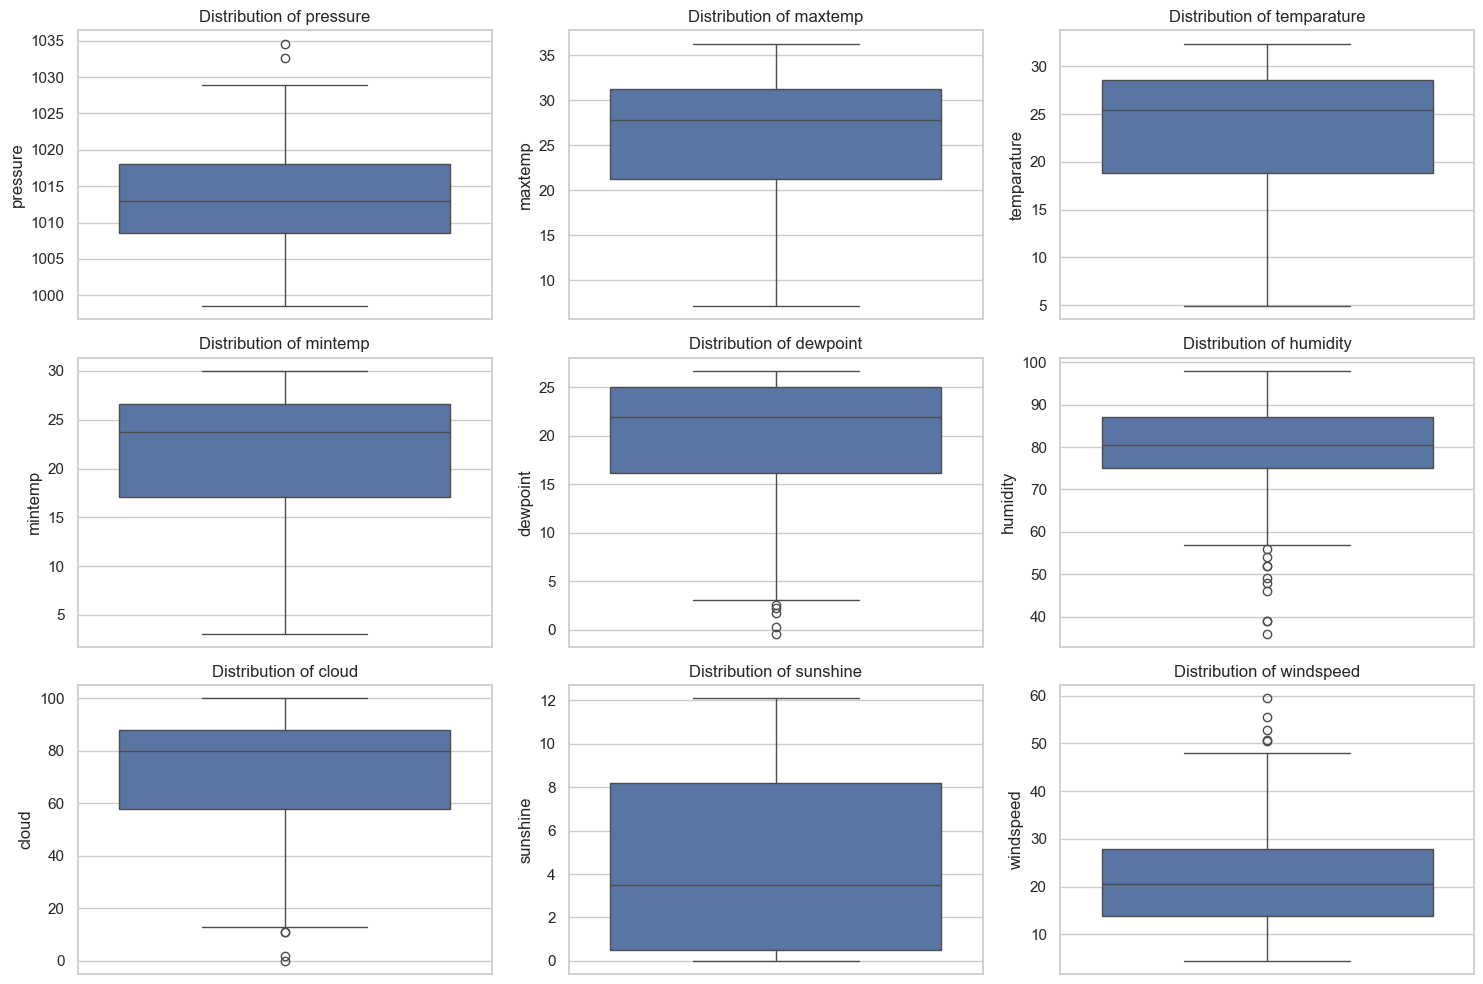

In [390]:
#check outliers using boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(y=data[column])
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


The boxplots show that most variables follow a fairly stable range, but several features such as dewpoint, humidity, cloud, sunshine, and windspeed contain noticeable outliers. Sunshine and windspeed are more skewed, while temperature-related features are more consistent with only a few low extremes. Overall, the data has natural variability with some irregular weather events causing outliers.

**Data Preprocessing**

In [391]:
#drop highly correlated columns 
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [392]:
print(data["rainfall"].value_counts()  )

rainfall
1    249
0    117
Name: count, dtype: int64


In [393]:
#separate majority and minority classes
df_majority = data[data.rainfall==1]
df_minority = data[data.rainfall==0]


In [394]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [395]:
#reducing the number of samples in the majority class to balance the dataset.
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority), # to match minority class
                                 random_state=42) # reproducible results

In [396]:
df_majority_downsampled.shape

(117, 8)

In [397]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [398]:
df_downsampled.shape

(234, 8)

In [399]:
#shuffling the dataset -> to avoid order bias and ensure the model learns properly.
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [400]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [401]:
#split the data into features and target variable as X and y
X = df_downsampled.drop(columns=['rainfall'])
y = df_downsampled['rainfall']

In [402]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [403]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [404]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   



In [405]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean CV Accuracy: 0.818918918918919


**Model training**

In [406]:
#Base rf model
base_rf_model = RandomForestClassifier(random_state=42)
base_rf_model.fit(X_train, y_train)
y_pred_base = base_rf_model.predict(X_test)


In [407]:
print("Base RF Test Accuracy:", accuracy_score(y_test, y_pred_base))
print("Base RF Classification Report:\n", classification_report(y_test, y_pred_base))
print("Base RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_base))

Base RF Test Accuracy: 0.7446808510638298
Base RF Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

Base RF Confusion Matrix:
 [[17  7]
 [ 5 18]]


In [408]:
rf_model = RandomForestClassifier(random_state=42)
parameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}
#hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [409]:
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters for RF:", grid_search.best_params_)

Best Hyperparameters for RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


**Model Evaluation**

In [410]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
Mean CV Accuracy: 0.818918918918919


In [411]:
#test set evaluation
y_test_pred = best_rf_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))   
print("test set confution matrix:\n", confusion_matrix(y_test, y_test_pred))

Test Set Accuracy: 0.7446808510638298
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

test set confution matrix:
 [[17  7]
 [ 5 18]]


*prediction on unknown data*

In [412]:
print(X.head())

   pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0    1022.2      14.1        78     90       0.0           30.0       28.5
1    1013.4      19.5        69     17      10.5           70.0       12.4
2    1006.1      24.4        74     27      10.8          220.0        8.7
3    1007.6      24.8        85     84       1.8           70.0       34.8
4    1021.2       8.4        66     18      10.1           20.0       24.4


In [413]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [414]:
input_data = (1015.9, 19.9, 95, 81, 0.0,40.0 ,13.7) #example input data
input_df = pd.DataFrame([input_data], columns=X_train.columns)
input_df


,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [415]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0]==1 else "No Rainfall" )

prediction result: Rainfall


In [416]:
 #save model and feature names to a picke name
model_data = {"model": best_rf_model,"feature names":X.columns.tolist()}

with open("model_RF.pkl","wb") as file:
    pickle.dump(model_data,file)